### (a)Building the PPI graph.
First, you will construct a simple __undirected, unweighted__ graph from this protein-protein interaction network. <br>
Namely, each graph node corresponds to a protein in the protein interaction network, and an __undirected edge exists between two nodes if there is an interaction between the two proteins.__<br>
Show how you construct your graph (code or log of interactive data analysis commands) as part of your solution to part a. <br>
Help us out by labeling the submission with the file header FPp2a.

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

In [48]:
# read edge list to networkx 
# the format of each line: (protein-1, protein-2, confidence of the interaction existence )
def createGraph(filename) :
    G = nx.Graph()
    for line in open(filename) :
        strlist = line.split('\t')
        n1 = strlist[0]
        n2 = strlist[1]
        weight = float(strlist[2])
        G.add_weighted_edges_from([(n1, n2, weight)]) #G.add_edges_from([(n1, n2)])
    return G

In [49]:
yeast_file = 'yeast.ppi'
G = createGraph(yeast_file)

### (b)Compute the degree distribution for the 5,001 nodes of the graph
plot it as a bar graph with degree on the x-axis and counts on the y-axis, and submit this image as __FPp2-degreedist.__

In [50]:
G.number_of_nodes()

5001

In [51]:
G.number_of_edges()

76025

In [52]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
#print("Degree sequence", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
print(degreeCount.items())

dict_items([(2950, 1), (2327, 1), (1093, 1), (1048, 1), (978, 1), (937, 1), (881, 1), (812, 1), (718, 1), (581, 1), (552, 2), (486, 1), (485, 1), (483, 1), (453, 1), (450, 1), (431, 1), (420, 1), (406, 1), (404, 1), (383, 1), (377, 1), (371, 1), (360, 1), (357, 1), (351, 1), (342, 1), (325, 1), (313, 1), (309, 2), (308, 1), (302, 1), (292, 1), (284, 1), (281, 1), (271, 1), (262, 1), (260, 1), (258, 1), (254, 1), (246, 1), (234, 1), (232, 1), (211, 1), (208, 1), (204, 2), (203, 1), (202, 1), (199, 1), (195, 1), (193, 1), (192, 2), (190, 1), (187, 2), (185, 1), (183, 2), (179, 1), (178, 1), (174, 1), (173, 1), (170, 1), (169, 1), (168, 2), (167, 1), (165, 1), (164, 1), (161, 1), (160, 3), (156, 1), (155, 1), (154, 2), (153, 1), (151, 2), (150, 1), (149, 2), (148, 1), (147, 2), (146, 1), (145, 1), (144, 1), (142, 1), (141, 1), (140, 1), (139, 3), (138, 2), (137, 2), (136, 2), (135, 3), (134, 2), (132, 1), (131, 4), (130, 1), (129, 4), (128, 2), (127, 3), (125, 2), (124, 4), (123, 3), (122

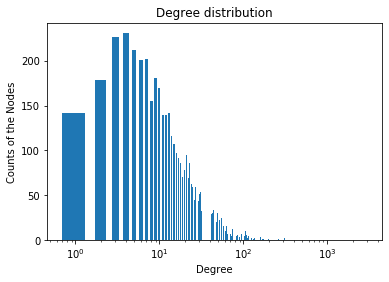

In [53]:
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.60)

#plt.hist(degree_values)
plt.xscale('log')
plt.title("Degree distribution")
plt.ylabel('Counts of the Nodes')
plt.xlabel("Degree")
plt.savefig('FPp2-degreedist.png')
plt.show()

#### Do you believe that this network fits the definition of scale-free? Why or why not?

(Put your answer in the file FPp2b-answer.)

I think this PPI Network is scale-free. As the degree sequence shows, there is one node whose degree can be 2950, but there are 142 nodes have degree=1, and 178 have degree = 2. I did some scaling work to my output image, without it the graph will shows really unbalanced.

### (c) Compute the local clustering coefficient for each node in the graph. 
Submit any __code__ you wrote, plus a __tab-delimited file, FPp2c-clustcoef__
1. First column is the protein ID 
2. Second column is the clustering coefficient. 
3. Both YGR296W and YPL098C have 5 interacting partners; which one has the higher clustering coecient? Explain briefly what the difference means.

In [54]:
G_test = nx.Graph()
G_test.add_nodes_from(['a','b','c','d','e','f','g'])
G_test.add_edges_from([('a','d'),('b','d'),('b','c'),('c','d'),('d','e'),('d','f'),('d','g'),('e','f'),('e','g')])

G1 = nx.Graph()
G1.add_nodes_from(['a','b','c','d','e','f','g'])
G1.add_edges_from([('a','b'),('a','e'),('b','c'),('b','e'),('b','f'),('c','f'),('c','e'),('d','f'),('e','f'),('g','f')])

In [55]:
def local_cluster(G, node):
    #print("degree ", G[node])
    x = sum([1 for u in G[node] for v in G[node] if not u == v and (u, v) in G.edges()])
    #print("x = ",x)
    if(len(G[node]) != 0 and len(G[node])!=1):
        y = (len(G[node]) * (len(G[node]) - 1))
        #print("y= ",y)
    else:
        return 0.0
    return  x/y

In [56]:
fp2c = 'FPp2c-clustcoef.txt'
nodes = list(G.nodes())

with open(fp2c,'a') as f:
    for node in nodes:
        f.write(node+'\t'+str(local_cluster(G,node))+'\n')

In [57]:
print("YGR296W: ",local_cluster(G,'YGR296W'))
print("YPL098C: " ,local_cluster(G,'YPL098C'))

YGR296W:  0.1
YPL098C:  0.8


The result of local cluster coefficient is YGR296W = 0.1 and YPL098C = 0.8, so the latter is higher. <br>
As the result shows, the difference between then is the Numerator, which means the number of triangles containing v. Consider that they have the same degree = 5, it means the interacting partners of YPL098C also interact with each other much more than YGR296W's partners.

In [58]:
def triangle(Graph):
    tri_test = list(nx.triangles(Graph).values())
    tmp = 0
    for i in tri_test:
        tmp += i
    return tmp/3.0

In [59]:
print(triangle(G))

354514.0


The number of triangles in G is 354514, I use the existing methods in networkX, which is the nx.triangles(), but this method will count the triangle of every nodes in Graph G, so to get the percise result, we need to divide the result by 3.

### (e)  A simple way to define the "closeness" is to use shortest path distance.
In order to estimate the path length distribution for this graph, sample 1000 nodes at random from the graph, and compute the distribution of shortest path distances between these 1000 nodes.

In [60]:
from random import sample
random_nodes = sample(list(G.nodes()),1000)

In [61]:
new_edge = []
for i in range(0,1000):
    for j in range(i+1,1000):
        if G.get_edge_data(random_nodes[i],random_nodes[j]):
            new_edge.append((random_nodes[i],random_nodes[j]))

G_tmp = nx.Graph()
G_tmp.add_nodes_from(random_nodes)
G_tmp.add_edges_from(new_edge)

In [62]:
tmp_nodes = list(G_tmp.nodes())
y = np.zeros((1000,1000),dtype=np.int)
for i in range(0,1000):
    for j in range(i+1,1000):
        if nx.has_path(G_tmp,tmp_nodes[i],tmp_nodes[j]):
            y[i][j] = nx.shortest_path_length(G_tmp, tmp_nodes[i],tmp_nodes[j])
    #print(y[i])

In [63]:
def get_freq(arr):
    unique = np.unique(arr)
    res = [0]*len(unique)
    for i in range(len(arr)):
        for j in range(i+1,len(arr)):
            for k in range(len(unique)):
                if arr[i][j] == unique[k]:
                    res[k] +=1
    return res

xout = np.unique(y)
yout = get_freq(y)

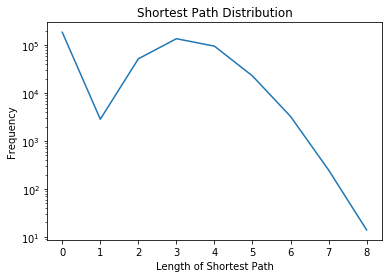

In [64]:
plt.title("Shortest Path Distribution")
plt.plot(xout,yout)
plt.xticks(xout)
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel("Length of Shortest Path")
plt.savefig("FPp2e-spdists.png")
plt.show()

### Description of methods used. 
How does this compare to your expectations for a protein-protein interaction network?

The unexpected thing I found is, the lenght of shortest path have too much 0, which I think it might be more reasonable to be less than len=1. But when I print all the column in y, I realized that there are many proteins do not connect with other proteins, it is because we only find the path between these 1000 nodes. Therefore, the graph with these 1000 nodes and their edges is __disconnected.__

In [65]:
tmp = list(nx.connected_components(G_tmp))
print(len(tmp))
#print(tmp[1:len(tmp)])

204


In [66]:
diam = []
for c in nx.connected_components(G_tmp):
    diam.append(nx.diameter(G_tmp.subgraph(c)))
print(max(diam))

8


### (f) Estimate the diameter of the network based on your answer to the previous question. 
How does what you found relate to the results of the previous question? 

Since this graph is undirected and disconnected graph, to count the diameter we need to know its connected components. But the result is, there are 204 components,and most of them is an individual node ( which menas diameter = 0 ), so the diam in this network is 8.